In [1]:
from qite_mult import *

%matplotlib inline
import matplotlib.pyplot as plt

from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

def get_matrix(qc):
    job = execute(qc, unit_sim)
    result = job.result()
    return np.asarray(result.get_unitary(qc))

def cull(a):
    b = np.where(np.abs(a) < 1e-5, 0, a)
    r = np.where( np.abs(np.real(b)) < 1e-5, 0, np.real(b) )
    i = np.where( np.abs(np.imag(b)) < 1e-5, 0, np.imag(b) )
    return r + 1j*i

print('{:.2f}'.format(np.pi))

3.14


In [2]:
N = 25
shots = 1000
db = 0.1
delta = 0.1

nbits = 2

hm_list = []
hm_list.append([])
hm_list[0].append([ [3*1 + 3*4],[1],[0,1] ])
# hm_list.append([])
# hm_list[1].append([ [1,3],[np.sqrt(0.5)/2,np.sqrt(0.5)/2],[1] ])


E,times = qite(db, delta, N, nbits, hm_list, aer_sim, shots=shots, debug=True)
print('Total time: {:.2f} seconds'.format(np.sum(times)))

Starting QITE Loop
i=1 -- Execution time: 0.43 seconds
i=2 -- Execution time: 2.11 seconds
i=3 -- Execution time: 3.42 seconds
i=4 -- Execution time: 5.24 seconds
i=5 -- Execution time: 7.36 seconds
i=6 -- Execution time: 9.00 seconds
i=7 -- Execution time: 10.29 seconds
i=8 -- Execution time: 12.49 seconds
i=9 -- Execution time: 14.71 seconds
i=10 -- Execution time: 16.26 seconds
i=11 -- Execution time: 15.58 seconds
i=12 -- Execution time: 19.27 seconds
i=13 -- Execution time: 22.00 seconds
i=14 -- Execution time: 23.23 seconds
i=15 -- Execution time: 24.88 seconds
i=16 -- Execution time: 26.43 seconds
i=17 -- Execution time: 27.29 seconds
i=18 -- Execution time: 28.82 seconds
i=19 -- Execution time: 31.62 seconds
i=20 -- Execution time: 33.93 seconds
i=21 -- Execution time: 36.27 seconds
i=22 -- Execution time: 34.98 seconds
i=23 -- Execution time: 37.85 seconds
i=24 -- Execution time: 38.51 seconds
i=25 -- Execution time: 42.22 seconds
Total time: {:.2f} seconds 524.2012553215027


C:\Users\CMP3KUMARS\Anaconda3\envs\qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


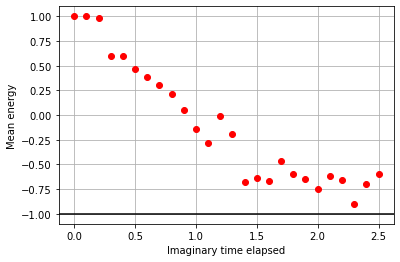

In [3]:
plt.plot(np.arange(0,N+1)*db,E,'ro',label='QITE')
plt.axhline(y=-1, color='k', linestyle='-')

plt.xlabel('Imaginary time elapsed')
plt.ylabel('Mean energy')

plt.grid()
plt.show()

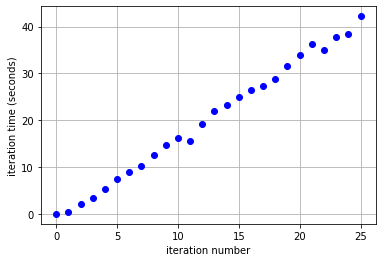

In [4]:
plt.plot(np.arange(0,N+1),times,'bo',label='iteration times')
plt.xlabel('iteration number')
plt.ylabel('iteration time (seconds)')
plt.grid()
plt.show()

In [2]:
N = 25
shots = 1000
db = 0.1
delta = 0.1

nbits = 2

backend = aer_sim

hm_list = []
hm_list.append([])
hm_list[-1].append([ [1+4*1],[np.sqrt(0.5)],[0,1] ])
hm_list.append([])
hm_list[-1].append([ [1,3],[0.5,0.5],[1] ])

E = np.zeros(N+1,dtype=complex)
alist = []
E[0] = measure_energy(alist, nbits, hm_list, backend, shots=shots)

alist = qite_step(alist, db, delta, nbits, hm_list, backend, shots=shots)

# E,times = qite(db, delta, N, nbits, hm_list, aer_sim, shots=shots, debug=True)
# print('Total time: {:.2f} seconds'.format(np.sum(times)))

measures:  [[0, 0], [1, 1]]
measures:  [[1, 1]]
measures:  [[1, 1]]


TypeError: propogate_mult() missing 1 required positional argument: 'qbits'

In [40]:
Nterms = len(hm_list)

qbits = [ hm_list[i][0][2] for i in range(Nterms) ]
print(qbits)

[[0, 1], [1]]


In [34]:
alist

[[(-7.173326535958773e-15-0j),
  (-0.005129849890735244-0j),
  (-0.018718187384998787-0j),
  (0.004201860241852501+0j),
  (-0.02487766823821154-0j),
  (-1.1554002558974308e-15-0j),
  (-0.064004566560212-0j),
  (0.027771302779465646+0j),
  (0.0030486911769565927+0j),
  (-0.07364315778803636-0j),
  (-0.0004746307547786961-0j),
  (-0.0032527739560252833-0j),
  (-0.0010728917046064395-0j),
  (0.005027018209953844+0j),
  (0.01639859445647829+0j),
  (-0.0002572665563217412-0j)],
 [(1.2022853333318986e-16+0j),
  (0.0038004807912321035+0j),
  (-0.10641346215449768-0j),
  (-0.003800480791232179-0j)]]

In [41]:
from helper import pauli_exp

Energy = 0
Nterms = len(hm_list)

qbits = [ hm_list[i][0][2] for i in range(Nterms) ]

for i in range(Nterms):
    for hm in hm_list[i]:
        print(i)
        for j in range(len(hm[0])):
            qc = QuantumCircuit(nbits,nbits)
            
            nb = len(qbits)
            for t in range(len(alist)):
                for gate in range(1,4** (len(qbits[t%Nterms])) ):
                    print('{}, {}'.format(t,gate))
                    angle = np.real(alist[t][gate])
                    if np.abs(angle) > 1e-5:
                        pauli_exp(qc,qbits,gate,angle)
            
            Energy += hm[1][j] * measure_mult(qc, hm[0][j], qbits, qbits, backend, num_shots=shots)
            print(Energy)

0
0, 1
0, 2
0, 3
0, 4
0, 5
0, 6


CircuitError: 'duplicate qubit arguments'

C:\Users\CMP3KUMARS\Anaconda3\envs\qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


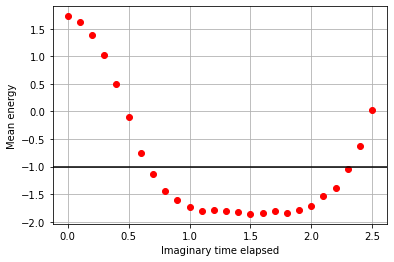

In [25]:
plt.plot(np.arange(0,N+1)*db,E,'ro',label='QITE')
plt.axhline(y=-1, color='k', linestyle='-')

plt.xlabel('Imaginary time elapsed')
plt.ylabel('Mean energy')

plt.grid()
plt.show()

In [26]:
from helper import pauli_prod

nbits = 2
nops = 4**nbits

idx = np.zeros([nops,nops], dtype=int)
coeff = np.zeros([nops,nops],dtype=complex)

for i in range(nops):
    for j in range(nops):
        idx[i][j], coeff[i][j] = pauli_prod(i,j,nbits)

print(idx)
print(coeff)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [ 1  0  3  2  5  4  7  6  9  8 11 10 13 12 15 14]
 [ 2  3  0  1  6  7  4  5 10 11  8  9 14 15 12 13]
 [ 3  2  1  0  7  6  5  4 11 10  9  8 15 14 13 12]
 [ 4  5  6  7  0  1  2  3 12 13 14 15  8  9 10 11]
 [ 5  4  7  6  1  0  3  2 13 12 15 14  9  8 11 10]
 [ 6  7  4  5  2  3  0  1 14 15 12 13 10 11  8  9]
 [ 7  6  5  4  3  2  1  0 15 14 13 12 11 10  9  8]
 [ 8  9 10 11 12 13 14 15  0  1  2  3  4  5  6  7]
 [ 9  8 11 10 13 12 15 14  1  0  3  2  5  4  7  6]
 [10 11  8  9 14 15 12 13  2  3  0  1  6  7  4  5]
 [11 10  9  8 15 14 13 12  3  2  1  0  7  6  5  4]
 [12 13 14 15  8  9 10 11  4  5  6  7  0  1  2  3]
 [13 12 15 14  9  8 11 10  5  4  7  6  1  0  3  2]
 [14 15 12 13 10 11  8  9  6  7  4  5  2  3  0  1]
 [15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]]
[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
   1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  1.+0.j  0.+1.j  0.-1.j  1.+0.j  1.+0.j 

In [53]:
from helper import int_to_base4
def int_to_pauli(x,nbits):
    p = int_to_base4(x,nbits)
#     print(x)
    pauli = [0]*nbits
#     print(pauli)
    for i in range(nbits):
        if p[i] == 0:
            pauli[i] = 'I'
        elif p[i] == 1:
            pauli[i] = 'X'
        elif p[i] == 2:
            pauli[i] = 'Y'
        elif p[i] == 3:
            pauli[i] = 'Z'
#         print(pauli)
    return ''.join(pauli)[::-1]

for i in range(-1,nops):
    for j in range(-1,nops):
        if i==-1:
            if j==-1:
                print('{:>2}'.format(''),end=' | ',flush=True)
            else:
                print('{:>4}'.format(int_to_pauli(j,nbits)),end=' | ',flush=True)
        else:
            if j == -1:
                print(int_to_pauli(i,nbits),end=' | ',flush=True)
            else:
                prod = int_to_pauli(idx[i][j],nbits)
                c = ''
                if np.real(coeff[i][j]) == 0:
                    if np.imag(coeff[i][j]) > 0:
                        c = '+i'
                    else:
                        c = '-i'
                else:
                    if np.real(coeff[i][j]) > 0:
                        c = '+'
                    else:
                        c = '-'
                s = c+prod
                print('{:>4}'.format(s),end=' | ',flush=True)
        if j == nops-1:
            print()

   |   II |   IX |   IY |   IZ |   XI |   XX |   XY |   XZ |   YI |   YX |   YY |   YZ |   ZI |   ZX |   ZY |   ZZ | 
II |  +II |  +IX |  +IY |  +IZ |  +XI |  +XX |  +XY |  +XZ |  +YI |  +YX |  +YY |  +YZ |  +ZI |  +ZX |  +ZY |  +ZZ | 
IX |  +IX |  +II | +iIZ | -iIY |  +XX |  +XI | +iXZ | -iXY |  +YX |  +YI | +iYZ | -iYY |  +ZX |  +ZI | +iZZ | -iZY | 
IY |  +IY | -iIZ |  +II | +iIX |  +XY | -iXZ |  +XI | +iXX |  +YY | -iYZ |  +YI | +iYX |  +ZY | -iZZ |  +ZI | +iZX | 
IZ |  +IZ | +iIY | -iIX |  +II |  +XZ | +iXY | -iXX |  +XI |  +YZ | +iYY | -iYX |  +YI |  +ZZ | +iZY | -iZX |  +ZI | 
XI |  +XI |  +XX |  +XY |  +XZ |  +II |  +IX |  +IY |  +IZ | +iZI | +iZX | +iZY | +iZZ | -iYI | -iYX | -iYY | -iYZ | 
XX |  +XX |  +XI | +iXZ | -iXY |  +IX |  +II | +iIZ | -iIY | +iZX | +iZI |  -ZZ |  +ZY | -iYX | -iYI |  +YZ |  -YY | 
XY |  +XY | -iXZ |  +XI | +iXX |  +IY | -iIZ |  +II | +iIX | +iZY |  +ZZ | +iZI |  -ZX | -iYY |  -YZ | -iYI |  +YX | 
XZ |  +XZ | +iXY | -iXX |  +XI |  +IZ | +iIY | -iIX |  +

In [60]:
# Function that returns all pauli strings with odd number of Y's
def odd_y_pauli(nbits):
    nops = 4**nbits
    odds = []
    for i in range(nops):
        p = int_to_base4(i,nbits)
        num_y = 0
        for x in p:
            if x == 2:
                num_y += 1
        if num_y % 2 == 1:
            odds.append(i)
    return odds

# Function to update alist for the assumption of real Hamiltonian and state vectors:
def update_alist_reals(sigma_expectation, alist, db, delta, hm, odds):
    # number of qubits the hm term acts on
    nbits = len(hm[0][2])
    # number of pauli terms in hm
    nterms = len(hm[0][0])
    # number of pauli strings on that many qubits
    nops = 2**(nbits - 1) * (2**nbits - 1)
    
    # Step 1: Obtain S matrix
    S = np.zeros([nops,nops],dtype=complex)
    for i in range(nops):
        for j in range(nops):
            p,c_ = pauli_prod(odds[i],odds[j],nbits)
            S[i,j] =  sigma_expectation[p] * c_
            
    # Step 2: Obtain b vector
    b = np.zeros(nops,dtype=complex)
    c = 1
    
    for i in range(nterms):
        c -= 2 * db * hm[0][1][i] * sigma_expectation[hm[0][0][i]]
    c = np.sqrt(c)
    
    for i in range(nops):
        b[i] += ( sigma_expectation[odds[i]]/c - sigma_expectation[odds[i]] ) / db
        for j in range(nterms):
            p,c_ = pauli_prod(odds[i],hm[0][0][j],nbits)
            b[i] -= hm[0][1][j] * c_ * sigma_expectation[p] / c
    b = 1j * (b - np.conj(b))
    
    # Step 3: Add regularizer
    dalpha = np.eye(nops)*delta
    
    # Step 4: Solve for linear equation, the solutions is multiplies by -2 because of the definition of unitary rotations is exp(-i theta/2)
    x = np.linalg.lstsq(S + np.transpose(S) + dalpha, -b, rcond=-1)[0]
    alist.append([])
    for i in range(len(x)):
        alist[-1].append(-x[i]*2*db)
        
    return c